# FIFA DataSet Analysis


* Importing Libraries

In [1]:

#Numpy
import numpy as np

# Pandas
import pandas as pd

# BeautifulSoup
from bs4 import BeautifulSoup

# Requests
import requests

# Reges
import regex as re 

# sqlite
import sqlite3 as sql

# MatplotLib
import matplotlib.pyplot as plt

* Web Scrapping


In [2]:
req=requests.get("https://sofifa.com/players?offset=1")
req

<Response [200]>

* BeautifulSoup

In [3]:
soup=BeautifulSoup(req.content)

In [4]:
# Adding the attributes to the array
arr=[]
for i in soup.findAll('td'):
    arr.append(str(i))

* Cleaning Image URL

In [5]:
clean_img=re.sub('<td.*\n.*data-src=.|".*',"",arr[0])
clean_img

'https://cdn.sofifa.net/players/231/677/22_60.png'

In [6]:
# The row is from 0-8
arr[0]

'<td class="col-avatar" data-balloon="Click here!" data-balloon-pos="up" data-balloon-visible=""><figure class="avatar">\n<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/231/677/22_60.png" data-srcset="https://cdn.sofifa.net/players/231/677/22_120.png 2x, https://cdn.sofifa.net/players/231/677/22_180.png 3x" data-type="player" id="231677" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>'

* Cleaning Name

In [7]:
clean_name=re.sub('<td.*\n.*s">|<\/div.*>',"",arr[1])
clean_name

'M. Rashford'

* Cleaning Age

In [8]:
clean_age=re.sub('<td.*e">|<.*>',"",arr[11])
clean_age

'16'

* Cleaning OVA

In [9]:
clean_ova=re.sub('<td.*p.*">|<.*>',"",arr[3])
clean_ova

'83'

* Cleaning POT

In [10]:
clean_pot=re.sub('<td.*p.*">|<.*>',"",arr[4])
clean_pot

'87'

* Cleaning Team & Contract

In [11]:
clean_team=re.sub('<td.*\n<d.*\n<i.*\n</f.*\n.*/">|<.*\n.*>\n.*>\n.*>',"",arr[5])
clean_team

'Manchester United'

* Cleaning Value

In [12]:
clean_value=re.sub('<td.*">|<.*>',"",arr[6])
clean_value

'€52M'

* Cleaning Wage

In [13]:
clean_wage=re.sub('<td.*">|<.*>',"",arr[7])
clean_wage

'€125K'

* Cleaning Total

In [14]:
clean_total=re.sub('<td.*">|<.*>',"",arr[8])
clean_total

'2118'

* Looping through the data

In [15]:
#0-8
img=[]
name=[]
age=[]
ova=[]
pot=[]
team=[]
value=[]
wage=[]
total=[]

count=0
for j in range(1,20):
    url=f"https://sofifa.com/players?offset={j}"
    req=requests.get(url)
    soup=BeautifulSoup(req.content)
    
    for i in soup.findAll('td'):
        clean_img=re.sub('<td.*\n.*data-src=.|".*',"",str(i))
        clean_name=re.sub('<td.*\n.*s">|<\/div.*>',"",str(i))
        clean_age=re.sub('<td.*e">|<.*>',"",str(i))
        clean_ova=re.sub('<td.*p.*">|<.*>',"",str(i))
        clean_pot=re.sub('<td.*p.*">|<.*>',"",str(i))
        clean_team=re.sub('<td.*\n<d.*\n<i.*\n</f.*\n.*/">|<.*\n.*>\n.*>\n.*>',"",str(i))
        clean_value=re.sub('<td.*">.|.<.*>',"",str(i))
        clean_wage=re.sub('<td.*">.|.<.*>',"",str(i))
        clean_total=re.sub('<td.*">|<.*>',"",str(i))
        
        if count==0:
            img.append(clean_img)
            count+=1
        elif count==1:
            name.append(clean_name)
            count+=1
        elif count==2:
            age.append(clean_age)
            count+=1
        elif count==3:
            ova.append(clean_ova)
            count+=1
        elif count==4:
            pot.append(clean_pot)
            count+=1
        elif count==5:
            team.append(clean_team)
            count+=1
        elif count==6:
            value.append(clean_value)
            count+=1
        elif count==7:
            wage.append(clean_wage)
            count+=1
        else:
            count=0
            total.append(clean_total)
        


* Type casting

In [16]:
fifa=pd.DataFrame({'Image':img,'Name':name,'Age':age,'OVA':ova,'POT':pot,'Team':team,'Value (M$)':value,'Wage (K$)':wage,'Total':total})
fifa['Age']=pd.to_numeric(fifa['Age'])
fifa['OVA']=pd.to_numeric(fifa['OVA'])
fifa['POT']=pd.to_numeric(fifa['POT'])
fifa['Value (M$)']=pd.to_numeric(fifa['Value (M$)'])
fifa['Wage (K$)']=pd.to_numeric(fifa['Wage (K$)'])
fifa['Total']=pd.to_numeric(fifa['Total'])

In [17]:
# Getting the basic info for the DF
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image       1140 non-null   object 
 1   Name        1140 non-null   object 
 2   Age         1140 non-null   int64  
 3   OVA         1140 non-null   int64  
 4   POT         1140 non-null   int64  
 5   Team        1140 non-null   object 
 6   Value (M$)  1140 non-null   float64
 7   Wage (K$)   1140 non-null   int64  
 8   Total       1140 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 80.3+ KB


In [18]:
# Shape of the DF
fifa.shape

(1140, 9)

*Droping the Image url column from the DF

In [19]:
# Remmoving the Image column
fifa.drop(columns=["Image"],inplace=True,axis=1)

* 1st 20 datapoints

In [20]:
fifa.head(20)

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
0,M. Rashford,23,83,87,Manchester United,52.0,125,2118
1,Gavi,16,77,89,FC Barcelona,24.0,14,1970
2,N. Zalewski,19,68,82,Roma,2.9,10,1697
3,C. Nkunku,23,86,89,RB Leipzig,93.0,110,2199
4,L. Geertruida,20,76,84,Feyenoord,15.5,8,1882
5,A. Tchouaméni,21,81,88,AS Monaco,52.0,46,2141
6,O. Kökçü,20,78,85,Feyenoord,27.5,10,2058
7,D. Núñez,22,78,86,SL Benfica,32.0,15,1987
8,D. Kamada,24,79,82,Eintracht Frankfurt,24.0,29,1951
9,J. Gvardiol,19,79,89,RB Leipzig,35.5,35,2017


* Last 20 Datapoints

In [21]:
fifa.tail(20)

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
1120,E. Camavinga,18,79,89,Real Madrid CF,37.0,48,2109
1121,D. Scarlett,17,64,86,Tottenham Hotspur,1.8,4,1519
1122,H. Elliott,18,73,87,Liverpool,7.0,23,1723
1123,M. Cash,23,78,83,Aston Villa,20.0,50,1982
1124,K. Havertz,22,84,91,Chelsea,85.5,130,2038
1125,L. Díaz,24,83,86,Liverpool,49.5,130,2040
1126,Fábio Carvalho,18,73,86,Fulham,7.0,15,1784
1127,Diogo Jota,24,85,89,Liverpool,78.0,155,2188
1128,F. de Jong,24,87,92,FC Barcelona,119.5,210,2235
1129,T. Alexander-Arnold,22,87,90,Liverpool,102.5,150,2238


* Statistical Data

In [22]:
fifa.describe()

,Age,OVA,POT,Value (M$),Wage (K$),Total
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,21.513158,79.521053,87.438596,44.828333,73.194737,1964.142982
std,3.932798,6.278333,3.330849,37.331046,85.444049,170.490399
min,16.000000,64.000000,75.000000,1.700000,2.000000,1519.000000
25%,19.000000,76.000000,86.000000,16.500000,16.000000,1856.000000
50%,21.000000,80.000000,87.000000,36.000000,35.000000,1989.000000
75%,23.000000,83.000000,90.000000,64.500000,110.000000,2091.000000
max,36.000000,92.000000,95.000000,194.000000,450.000000,2257.000000


# Analysis

* Display and drop all the duplicated datas

In [23]:
fifa.duplicated().sum()
fifa.drop_duplicates(inplace=True)

* Player who is having the highest wage?

In [24]:
fifa[fifa['Wage (K$)']==max(fifa['Wage (K$)'])]

# K. Benzema is the player with highest wage


,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
45,K. Benzema,33,91,91,Real Madrid CF,84.0,450,2145


* Find the youngest player(s)

In [25]:
# Youngest player
fifa[fifa['Age']==min(fifa['Age'])]

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
1,Gavi,16,77,89,FC Barcelona,24.0,14,1970
18,N. Mbamba,16,64,88,Club Brugge KV,1.7,50,1546
38,Y. Moukoko,16,69,89,Borussia Dortmund,3.8,5,1725


* Find the oldest player(s)

In [26]:
# Oldest player
fifa[fifa['Age']==max(fifa['Age'])][['Name',"Age"]]

,Name,Age
15,Cristiano Ronaldo,36


* List out the Top 10 players according to their POT

In [27]:
fifa.sort_values(by="POT", ascending=False)['Name'].head(10)

23             K. Mbappé
35            E. Haaland
21              L. Messi
40              P. Foden
539           F. de Jong
22                 Pedri
239           K. Havertz
45            K. Benzema
15     Cristiano Ronaldo
33          Vinícius Jr.
Name: Name, dtype: object

* Create a new DataFrame with the values of columns - Name & POT

In [28]:
new_df=fifa[['Name','POT']]
new_df

,Name,POT
0,M. Rashford,87
1,Gavi,89
2,N. Zalewski,82
3,C. Nkunku,89
4,L. Geertruida,84
...,...,...
899,E. Fernández,85
958,T. Almada,86
1017,E. Ndicka,85
1076,Raphinha,86


* Plot a graph for Player's name Vs Player's POT

<BarContainer object of 10 artists>

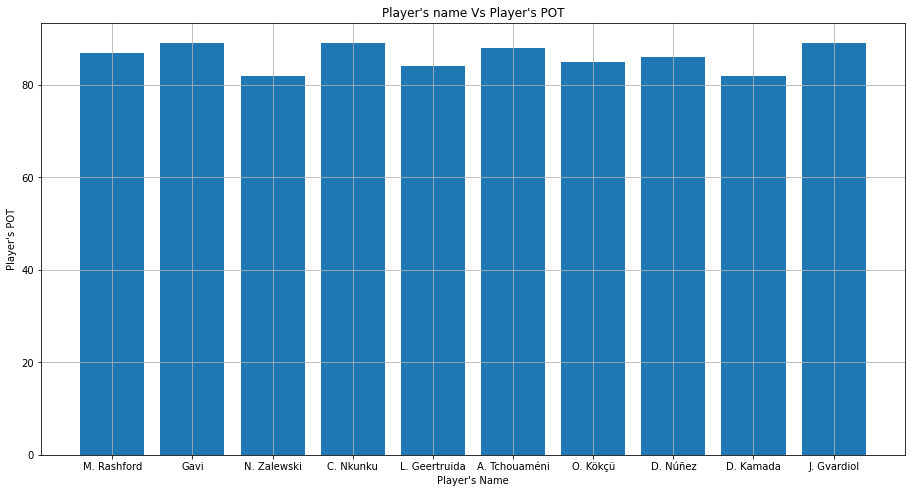

In [29]:
x=fifa['Name'].head(10)
y=fifa['POT'].head(10)
fig=plt.figure()
fig.add_axes([1,2,2,1.5])
plt.title("Player's name Vs Player's POT")
plt.xlabel("Player's Name")
plt.ylabel("Player's POT")
plt.grid()
plt.bar(x,y)

* Plot a Player's Name Vs Player's Wage Graph

<BarContainer object of 10 artists>

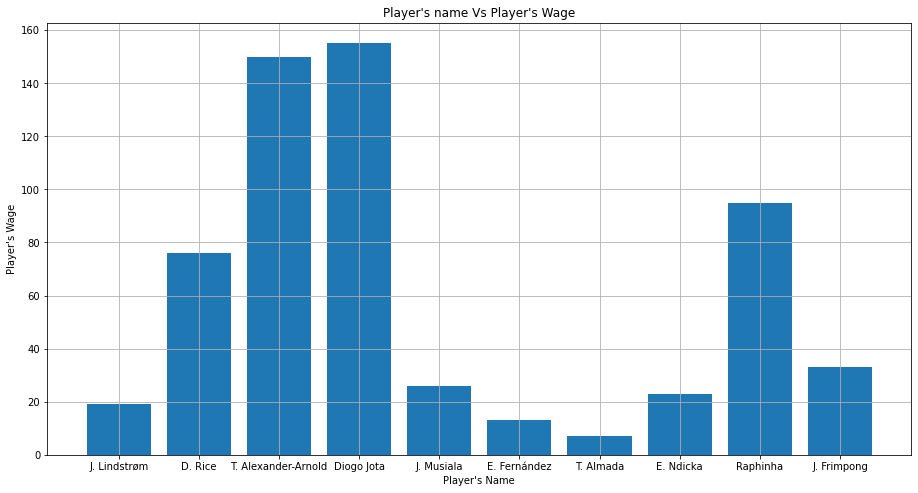

In [30]:
x=fifa['Name'].tail(10)
y=fifa['Wage (K$)'].tail(10)
fig=plt.figure()
fig.add_axes([1,2,2,1.5])
plt.title("Player's name Vs Player's Wage")
plt.xlabel("Player's Name")
plt.ylabel("Player's Wage")
plt.grid()
plt.bar(x,y)

* The players whose potential is more than or equal to 90

In [33]:
fifa[fifa["POT"]>=90][['Name','POT']]

,Name,POT
12,Rafael Leão,90
15,Cristiano Ronaldo,91
19,D. Vlahović,90
21,L. Messi,92
22,Pedri,92
23,K. Mbappé,95
26,J. Bellingham,90
32,R. Gravenberch,90
33,Vinícius Jr.,91
35,E. Haaland,94


* The players who potential is more than 90 and age is less than 20

In [38]:
fifa[(fifa['POT']>90) & (fifa['Age']<20)]

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
22,Pedri,18,84,92,FC Barcelona,88.5,66,2096


* The players whose Value is greater than 10 and Wage is less than 50

In [40]:
fifa[(fifa['Value (M$)']>10) & (fifa['Wage (K$)']<50)]

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
1,Gavi,16,77,89,FC Barcelona,24.0,14,1970
4,L. Geertruida,20,76,84,Feyenoord,15.5,8,1882
5,A. Tchouaméni,21,81,88,AS Monaco,52.0,46,2141
6,O. Kökçü,20,78,85,Feyenoord,27.5,10,2058
7,D. Núñez,22,78,86,SL Benfica,32.0,15,1987
8,D. Kamada,24,79,82,Eintracht Frankfurt,24.0,29,1951
9,J. Gvardiol,19,79,89,RB Leipzig,35.5,35,2017
11,J. Timber,20,79,88,Ajax,36.0,13,1935
13,N. Schlotterbeck,21,80,86,Sport-Club Freiburg,31.0,23,1839
16,L. Sinisterra,22,78,84,Feyenoord,22.5,13,2009
